In [1]:
%matplotlib inline

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from datetime import datetime
from sklearn import linear_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/Users/prasenjitnandi/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Impoting the data from yahoo finance
end=datetime.now()
start=datetime(end.year-5,end.month,end.day)
TCS=DataReader("TCS.NS","yahoo",start,end)

In [3]:
TCS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-06,1281.449951,1250.050049,1279.000000,1273.650024,1568542.0,1097.812134
2015-04-07,1299.500000,1272.000000,1281.219971,1292.500000,1886922.0,1114.059692
2015-04-08,1328.250000,1295.430054,1297.000000,1320.699951,1652134.0,1138.366455
2015-04-09,1343.719971,1317.569946,1329.500000,1332.280029,2544450.0,1148.347778
2015-04-10,1335.400024,1314.000000,1324.250000,1326.880005,1815544.0,1143.693359
...,...,...,...,...,...,...
2020-03-26,1832.050049,1722.550049,1831.599976,1790.949951,4556067.0,1790.949951
2020-03-27,1850.000000,1750.400024,1820.000000,1824.500000,4331250.0,1824.500000
2020-03-30,1905.000000,1763.550049,1766.000000,1778.500000,8513547.0,1778.500000


In [9]:
#importing the ratio from moneycontrol usingh beautifulo sopup to scrap the webpage
r= requests.get("https://www.moneycontrol.com/financials/tataconsultancyservices/ratiosVI/TCS")
data=r.text
soup=BeautifulSoup(data,"lxml")

soup1=soup.find_all("tr",attrs={"class":""})
data=[]
for i in soup1:
    val=i.text.split()
    data.append(val)


data=pd.DataFrame(list(data))
data

data[0]=data[0]+" "+data[1]
data.drop([1],axis=1,inplace=True)
data[0]=data[0]+" "+data[2]

data.iloc[1:2,1]=data.iloc[1:2,2]
data.iloc[2:3,1]=data.iloc[2:3,2]
data.iloc[3:4,1]=data.iloc[3:4,2]
data.iloc[4:5,1]=data.iloc[4:5,3]
data.iloc[5:6,1]=data.iloc[5:6,3]
data.iloc[6:7,1]=data.iloc[6:7,2]
data.iloc[7:8,1]=data.iloc[7:8,3]
data.iloc[11:12,1]=data.iloc[11:12,2]
data.iloc[11:12,1]=data.iloc[11:12,2]
data.iloc[11:12,1]=data.iloc[11:12,2]
data.iloc[12:13,1]=data.iloc[12:13,2]
data.iloc[13:14,1]=data.iloc[13:14,2]
data.iloc[14:15,1]=data.iloc[14:15,2]
data.iloc[15:16,1]=data.iloc[15:16,3]
data.iloc[16:17,1]=data.iloc[16:17,5]
data.iloc[17:18,1]=data.iloc[17:18,4]
data.iloc[18:19,1]=data.iloc[18:19,3]
data.iloc[19:20,1]=data.iloc[19:20,2]
data.iloc[20:21,1]=data.iloc[20:21,3]
data.iloc[21:22,1]=data.iloc[21:22,2]
data.iloc[22:23,1]=data.iloc[22:23,2]
data.iloc[23:24,1]=data.iloc[23:24,3]
data.iloc[24:25,1]=data.iloc[24:25,4]
data.iloc[25:26,1]=data.iloc[25:26,4]
data.iloc[26:27,1]=data.iloc[26:27,3]
data.iloc[27:28,1]=data.iloc[27:28,4]
data.iloc[28:29,1]=data.iloc[28:29,2]
data.iloc[29:30,1]=data.iloc[29:30,3]
data.iloc[31:32,1]=data.iloc[31:32,3]
data.iloc[32:33,1]=data.iloc[32:33,2]
data.iloc[34:35,1]=data.iloc[34:35,2]


data.iloc[1:2,2]=data.iloc[1:2,3]
data.iloc[2:3,2]=data.iloc[2:3,3]
data.iloc[3:4,2]=data.iloc[3:4,3]
data.iloc[4:5,2]=data.iloc[4:5,4]
data.iloc[5:6,2]=data.iloc[5:6,4]
data.iloc[6:7,2]=data.iloc[6:7,3]
data.iloc[7:8,2]=data.iloc[7:8,4]
data.iloc[11:12,2]=data.iloc[11:12,3]
data.iloc[11:12,2]=data.iloc[11:12,3]
data.iloc[11:12,2]=data.iloc[11:12,3]
data.iloc[12:13,2]=data.iloc[12:13,3]
data.iloc[13:14,2]=data.iloc[13:14,3]
data.iloc[14:15,2]=data.iloc[14:15,3]
data.iloc[15:16,2]=data.iloc[15:16,4]
data.iloc[16:17,2]=data.iloc[16:17,6]
data.iloc[17:18,2]=data.iloc[17:18,5]
data.iloc[18:19,2]=data.iloc[18:19,4]
data.iloc[19:20,2]=data.iloc[19:20,3]
data.iloc[20:21,2]=data.iloc[20:21,4]
data.iloc[21:22,2]=data.iloc[21:22,3]
data.iloc[22:23,2]=data.iloc[22:23,3]
data.iloc[23:24,2]=data.iloc[23:24,4]
data.iloc[24:25,2]=data.iloc[24:25,5]
data.iloc[25:26,2]=data.iloc[25:26,5]
data.iloc[26:27,2]=data.iloc[26:27,4]
data.iloc[27:28,2]=data.iloc[27:28,5]
data.iloc[28:29,2]=data.iloc[28:29,3]
data.iloc[29:30,2]=data.iloc[29:30,4]
data.iloc[31:32,2]=data.iloc[31:32,4]
data.iloc[32:33,2]=data.iloc[32:33,3]
data.iloc[34:35,2]=data.iloc[34:35,3]

data.iloc[1:2,3]=data.iloc[1:2,4]
data.iloc[2:3,3]=data.iloc[2:3,4]
data.iloc[3:4,3]=data.iloc[3:4,4]
data.iloc[4:5,3]=data.iloc[4:5,5]
data.iloc[5:6,3]=data.iloc[5:6,5]
data.iloc[6:7,3]=data.iloc[6:7,4]
data.iloc[7:8,3]=data.iloc[7:8,5]
data.iloc[11:12,3]=data.iloc[11:12,4]
data.iloc[11:12,3]=data.iloc[11:12,4]
data.iloc[11:12,3]=data.iloc[11:12,4]
data.iloc[12:13,3]=data.iloc[12:13,4]
data.iloc[13:14,3]=data.iloc[13:14,4]
data.iloc[14:15,3]=data.iloc[14:15,4]
data.iloc[15:16,3]=data.iloc[15:16,5]
data.iloc[16:17,3]=data.iloc[16:17,7]
data.iloc[17:18,3]=data.iloc[17:18,6]
data.iloc[18:19,3]=data.iloc[18:19,5]
data.iloc[19:20,3]=data.iloc[19:20,4]
data.iloc[20:21,3]=data.iloc[20:21,5]
data.iloc[21:22,3]=data.iloc[21:22,4]
data.iloc[22:23,3]=data.iloc[22:23,4]
data.iloc[23:24,3]=data.iloc[23:24,5]
data.iloc[24:25,3]=data.iloc[24:25,6]
data.iloc[25:26,3]=data.iloc[25:26,6]
data.iloc[26:27,3]=data.iloc[26:27,5]
data.iloc[27:28,3]=data.iloc[27:28,6]
data.iloc[28:29,3]=data.iloc[28:29,4]
data.iloc[29:30,3]=data.iloc[29:30,5]
data.iloc[31:32,3]=data.iloc[31:32,5]
data.iloc[32:33,3]=data.iloc[32:33,4]
data.iloc[34:35,3]=data.iloc[34:35,4]



data.iloc[1:2,4]=data.iloc[1:2,5]
data.iloc[2:3,4]=data.iloc[2:3,5]
data.iloc[3:4,4]=data.iloc[3:4,5]
data.iloc[4:5,4]=data.iloc[4:5,6]
data.iloc[5:6,4]=data.iloc[5:6,6]
data.iloc[6:7,4]=data.iloc[6:7,5]
data.iloc[7:8,4]=data.iloc[7:8,6]
data.iloc[11:12,4]=data.iloc[11:12,5]
data.iloc[11:12,4]=data.iloc[11:12,5]
data.iloc[11:12,4]=data.iloc[11:12,5]
data.iloc[12:13,4]=data.iloc[12:13,5]
data.iloc[13:14,4]=data.iloc[13:14,5]
data.iloc[14:15,4]=data.iloc[14:15,5]
data.iloc[15:16,4]=data.iloc[15:16,6]
data.iloc[16:17,4]=data.iloc[16:17,8]
data.iloc[17:18,4]=data.iloc[17:18,7]
data.iloc[18:19,4]=data.iloc[18:19,6]
data.iloc[19:20,4]=data.iloc[19:20,5]
data.iloc[20:21,4]=data.iloc[20:21,6]
data.iloc[21:22,4]=data.iloc[21:22,5]
data.iloc[22:23,4]=data.iloc[22:23,5]
data.iloc[23:24,4]=data.iloc[23:24,6]
data.iloc[24:25,4]=data.iloc[24:25,7]
data.iloc[25:26,4]=data.iloc[25:26,7]
data.iloc[26:27,4]=data.iloc[26:27,6]
data.iloc[27:28,4]=data.iloc[27:28,7]
data.iloc[28:29,4]=data.iloc[28:29,5]
data.iloc[29:30,4]=data.iloc[29:30,6]
data.iloc[31:32,4]=data.iloc[31:32,6]
data.iloc[32:33,4]=data.iloc[32:33,5]
data.iloc[34:35,4]=data.iloc[34:35,5]


data.iloc[1:2,5]=data.iloc[1:2,6]
data.iloc[2:3,5]=data.iloc[2:3,6]
data.iloc[3:4,5]=data.iloc[3:4,6]
data.iloc[4:5,5]=data.iloc[4:5,7]
data.iloc[5:6,5]=data.iloc[5:6,7]
data.iloc[6:7,5]=data.iloc[6:7,6]
data.iloc[7:8,5]=data.iloc[7:8,7]
data.iloc[11:12,5]=data.iloc[11:12,6]
data.iloc[11:12,5]=data.iloc[11:12,6]
data.iloc[11:12,5]=data.iloc[11:12,6]
data.iloc[12:13,5]=data.iloc[12:13,6]
data.iloc[13:14,5]=data.iloc[13:14,6]
data.iloc[14:15,5]=data.iloc[14:15,6]
data.iloc[15:16,5]=data.iloc[15:16,7]
data.iloc[16:17,5]=data.iloc[16:17,9]
data.iloc[17:18,5]=data.iloc[17:18,8]
data.iloc[18:19,5]=data.iloc[18:19,7]
data.iloc[19:20,5]=data.iloc[19:20,6]
data.iloc[20:21,5]=data.iloc[20:21,7]
data.iloc[21:22,5]=data.iloc[21:22,6]
data.iloc[22:23,5]=data.iloc[22:23,6]
data.iloc[23:24,5]=data.iloc[23:24,7]
data.iloc[24:25,5]=data.iloc[24:25,8]
data.iloc[25:26,5]=data.iloc[25:26,8]
data.iloc[26:27,5]=data.iloc[26:27,7]
data.iloc[27:28,5]=data.iloc[27:28,8]
data.iloc[28:29,5]=data.iloc[28:29,6]
data.iloc[29:30,5]=data.iloc[29:30,7]
data.iloc[31:32,5]=data.iloc[31:32,7]
data.iloc[32:33,5]=data.iloc[32:33,6]
data.iloc[34:35,5]=data.iloc[34:35,6]



data.drop([7,8,9,10],axis=1,inplace=True)
data.drop([0],axis=0,inplace=True)

data.iloc[8:9,0]="PBIT/Share (Rs.)"
data.iloc[7:8,0]="PBDIT/Share (Rs.)"
data.iloc[9:10,0]="PBT/Share (Rs.)"
data.iloc[29:30,0]="EV/EBITDA (X)"
data.iloc[32:33,0]="Price/BV (X)"
data.iloc[34:35,0]="Earnings Yield"
data.rename(columns={0:"Ratio",2:"Mar19",3:"Mar18",4:"Mar17",5:"Mar16",6:"Mar15"},inplace=True)


data1=data.iloc[27:28]
data2=data.iloc[23:24]
data.drop([28,23],axis=0,inplace=True)



data["Mar19"]=data["Mar19"].astype(float)
data["Mar18"]=data["Mar18"].astype(float)
data["Mar17"]=data["Mar17"].astype(float)
data["Mar16"]=data["Mar16"].astype(float)
data["Mar15"]=data["Mar15"].astype(float)

data


,Ratio,Mar19,Mar18,Mar17,Mar16,Mar15
1,Basic EPS (Rs.),79.34,131.15,120.04,117.11,98.31
2,Diluted EPS (Rs.),79.34,131.15,120.04,117.11,98.31
3,Cash EPS (Rs.),84.75,140.77,128.06,124.54,105.43
4,Book Value [ExclRevalReserve]/Share,210.39,397.20,396.05,330.02,231.87
5,Book Value [InclRevalReserve]/Share,210.39,397.20,396.05,330.02,231.87
6,Dividend / Share(Rs.),30.00,50.00,47.00,43.50,79.00
7,Revenue from Operations/Share,328.45,509.72,470.52,435.86,375.65
8,PBDIT/Share (Rs.),113.58,175.96,160.70,156.40,130.16
9,PBIT/Share (Rs.),109.00,167.34,152.70,148.99,123.05
10,PBT/Share (Rs.),108.55,167.18,152.62,148.93,125.34


In [11]:
#maximum earning potential from the stock in the last five year
TCS_price=TCS["Adj Close"]
prices = iter(TCS_price)
result = 0
minSofar = next(prices)
for price in prices:
    minSofar = min(minSofar, price)
    result = max (result, price - minSofar)
result

1280.1573486328125

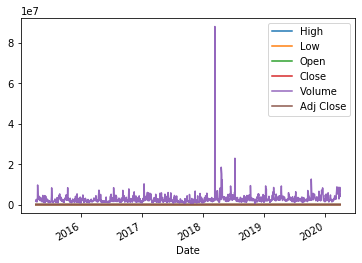

In [12]:
#Plotting the five year graph
TCS.plot()

In [13]:
#Impoting the data from yahoo finance for the last one year
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
TCS_oneYear=DataReader("TCS.NS","yahoo",start,end)

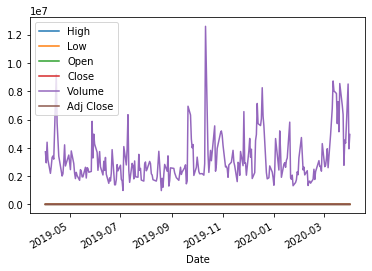

In [14]:
#Plotting the one year graph
TCS_oneYear.plot()

In [15]:
#maximum earning potential from the stock in the last one year
TCS_price1=TCS_oneYear["Adj Close"]
prices = iter(TCS_price1)
result = 0
minSofar = next(prices)
for price in prices:
    minSofar = min(minSofar, price)
    result = max (result, price - minSofar)
result

284.9208984375

# Plotting the Candlestick

In [25]:
TCS1=TCS_oneYear.copy()

In [26]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [27]:
df_ohlc=TCS1["Adj Close"].resample("10D").ohlc()
df_voliume=TCS1["Volume"].resample("10D").sum()

In [28]:
df_ohlc.reset_index(inplace=True)

In [29]:
df_ohlc["Date"]=df_ohlc["Date"].map(mdates.date2num)

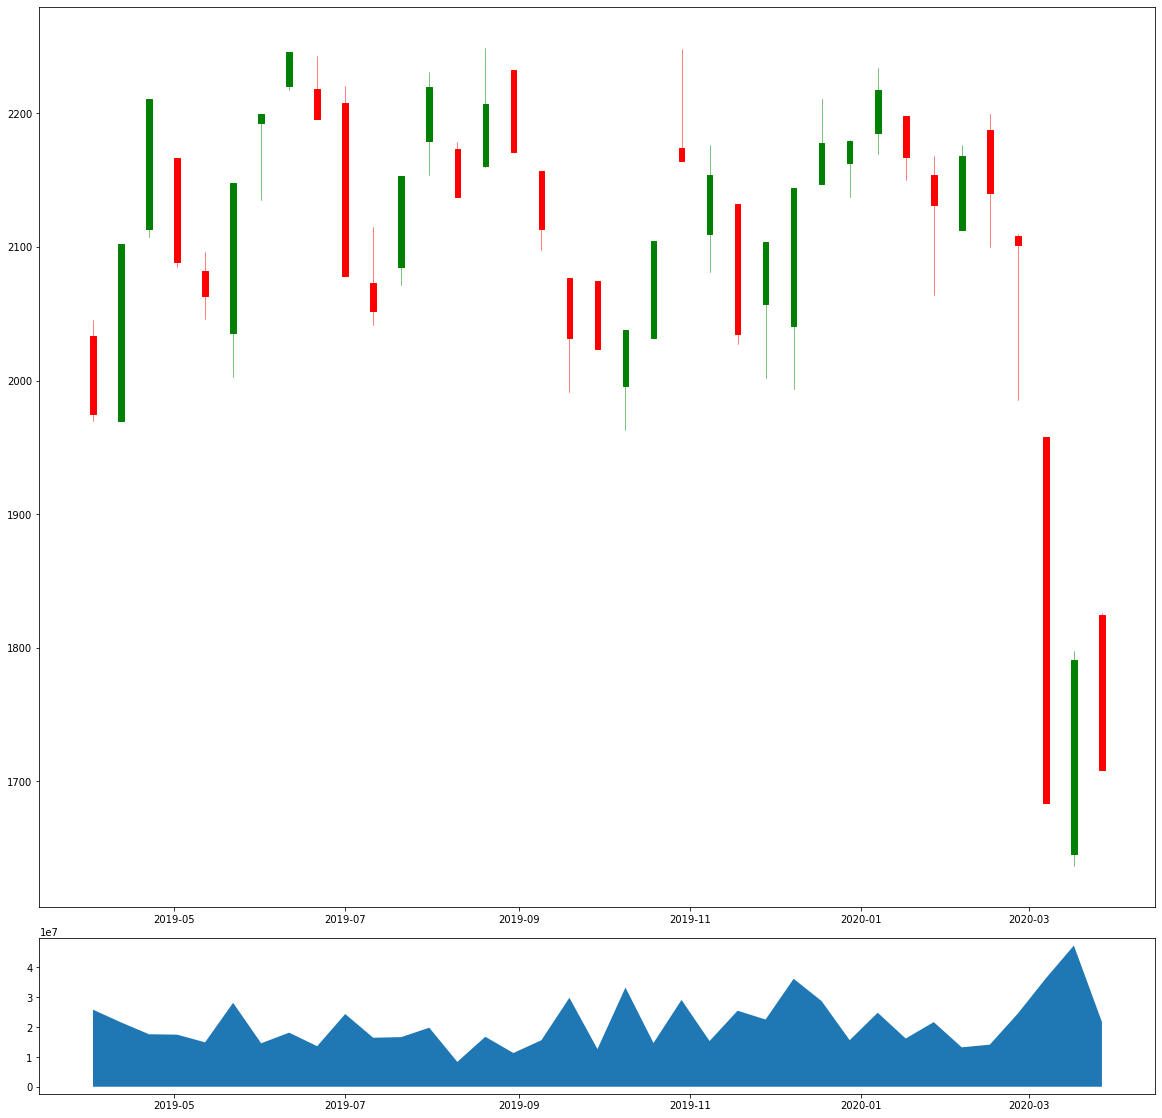

In [30]:
plt.figure(figsize=(20,20))
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values, width=2,colorup="g")
ax2.fill_between(df_voliume.index.map(mdates.date2num),df_voliume.values,0)

# Moving Average

In [31]:
ma_days=[10,20,50]

for ma in ma_days:
    column=f"MA for {ma}days"
    TCS_oneYear[column]=TCS_oneYear["Adj Close"].rolling(ma).mean()

In [33]:
TCS_oneYear.reset_index(inplace=True)

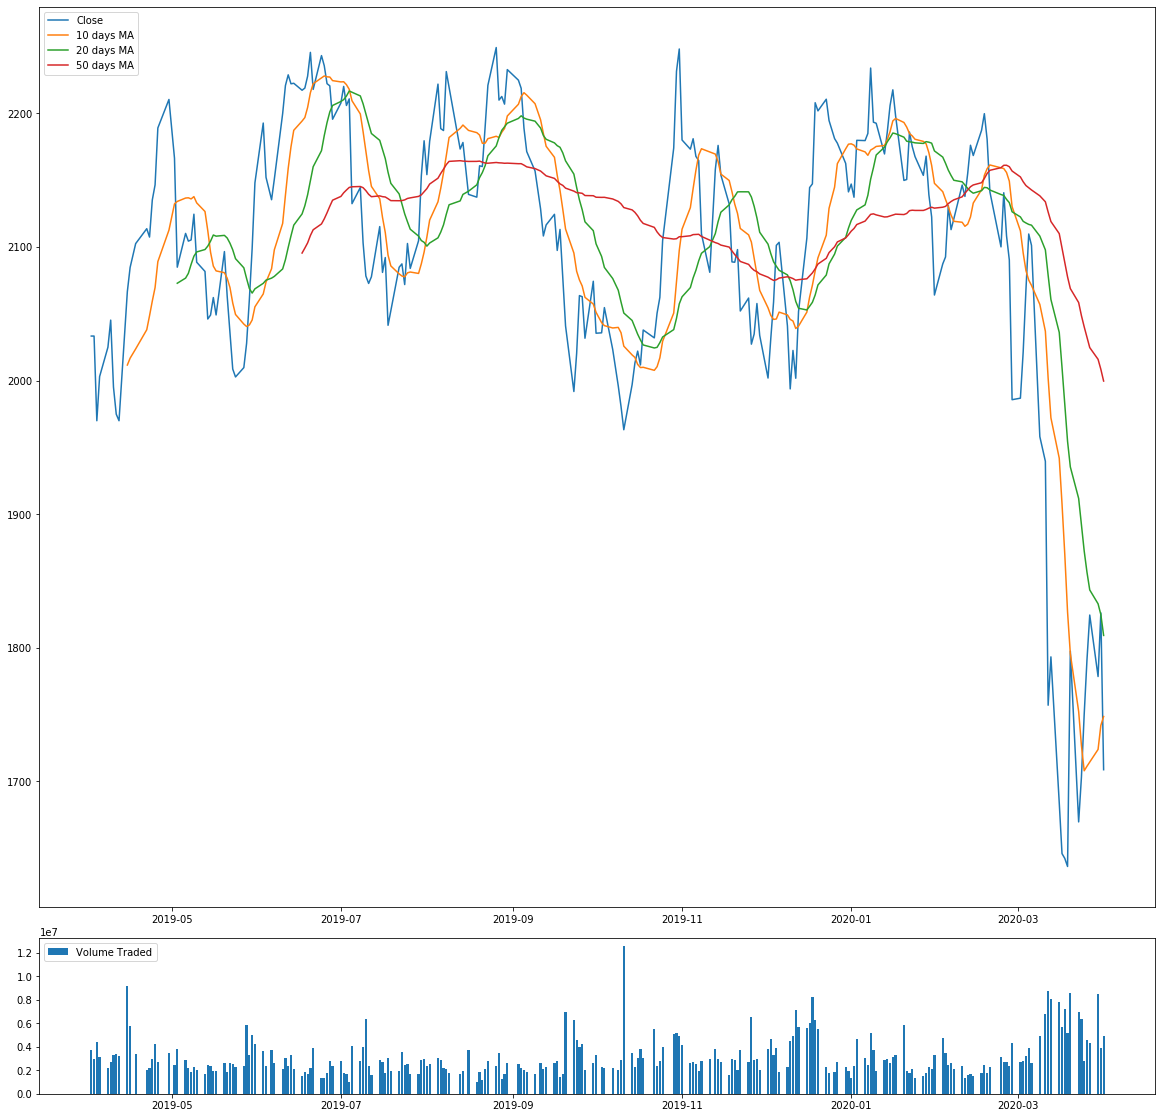

In [34]:
plt.figure(figsize=(20,20))
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.plot(TCS_oneYear["Date"],TCS_oneYear["Adj Close"],label="Close")
ax1.plot(TCS_oneYear["Date"],TCS_oneYear["MA for 10days"],label="10 days MA")
ax1.plot(TCS_oneYear["Date"],TCS_oneYear["MA for 20days"],label="20 days MA")
ax1.plot(TCS_oneYear["Date"],TCS_oneYear["MA for 50days"],label="50 days MA")
ax2.bar(TCS_oneYear["Date"],TCS_oneYear["Volume"],label="Volume Traded")
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")

# Ploting the returns

In [35]:
TCS_oneYear["Daily Return"]=TCS_oneYear["Adj Close"].pct_change()

Text(0.5, 1.0, 'Return for the last 1 year')

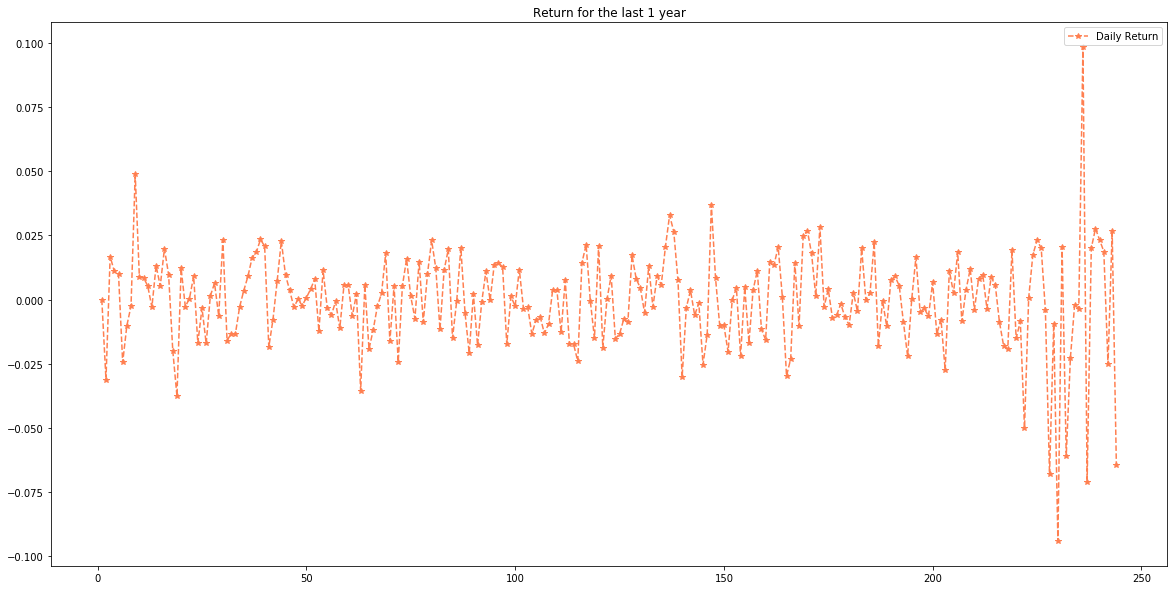

In [37]:
plt.figure(figsize=(20,10))
TCS_oneYear['Daily Return'].plot(color="Coral",legend=True, linestyle='--', marker='*')
plt.title("Return for the last 1 year")

In [38]:
TCS["Daily Return"]=TCS["Adj Close"].pct_change()

Text(0.5, 1.0, 'Return for the last 5 years')

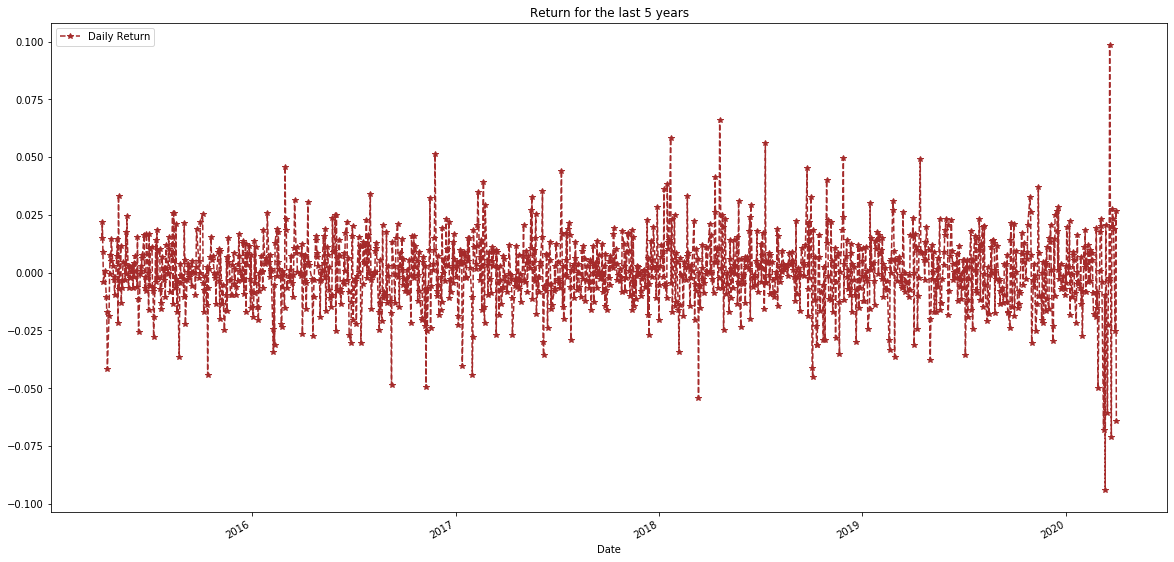

In [39]:
plt.figure(figsize=(20,10))
TCS['Daily Return'].plot(color="Brown",legend=True, linestyle='--', marker='*')
plt.title("Return for the last 5 years")

# EMA

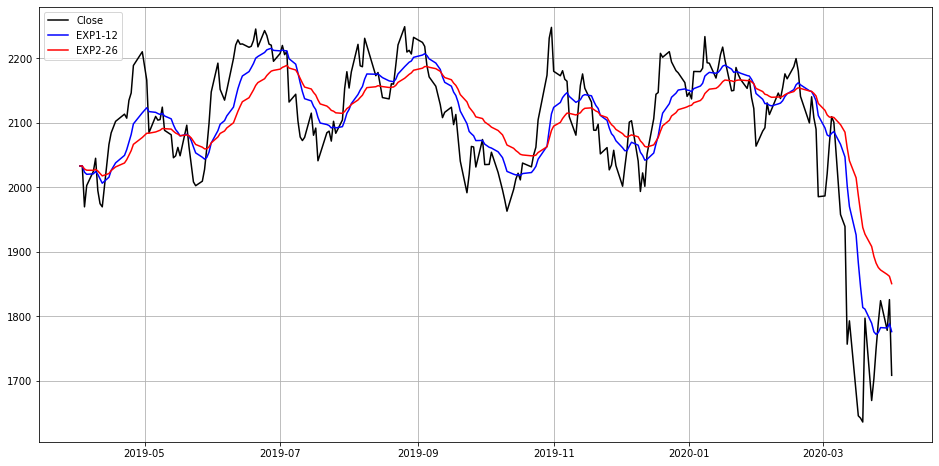

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))
TCS_oneYear['EXP1'] = TCS_oneYear['Adj Close'].ewm(span=12, adjust=False).mean()
TCS_oneYear['EXP2'] = TCS_oneYear['Adj Close'].ewm(span=26, adjust=False).mean()
TCS_oneYear['MACD'] = TCS_oneYear['EXP1']-TCS_oneYear['EXP2']
TCS_oneYear['EXP3'] = TCS_oneYear['MACD'].ewm(span=9, adjust=False).mean()
TCS_oneYear['MACD_Hist'] = TCS_oneYear['MACD'] - TCS_oneYear['EXP3']

plt.plot(TCS_oneYear['Date'], TCS_oneYear['Adj Close'], label='Close', color='black')
plt.plot(TCS_oneYear['Date'], TCS_oneYear['EXP1'], label='EXP1-12', color='blue')
plt.plot(TCS_oneYear['Date'], TCS_oneYear['EXP2'], label='EXP2-26', color='red')
plt.legend(loc='upper left')
plt.grid()

/Users/prasenjitnandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


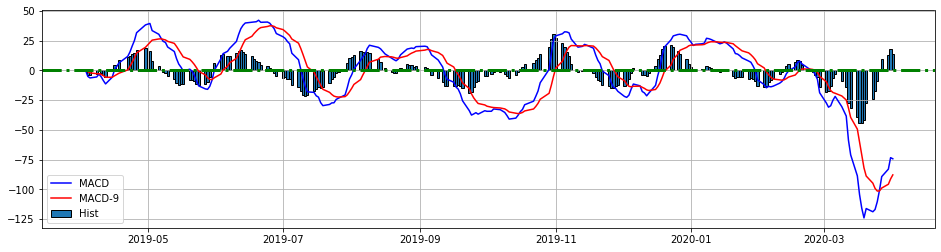

In [44]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(TCS_oneYear['Date'], TCS_oneYear['MACD_Hist'] , width=1, label='Hist',edgecolor="k")
ax.xaxis_date
plt.plot(TCS_oneYear['Date'],  TCS_oneYear['MACD'], label='MACD',color='blue')
plt.plot(TCS_oneYear['Date'],  TCS_oneYear['EXP3'], label='MACD-9',color='red')
plt.axhline(0, color='Green', linewidth=3, linestyle='-.' )
plt.legend(loc='bottom left')
plt.grid()
plt.show()

# RSI

In [49]:
rsi_period=14
chg=TCS_oneYear["Adj Close"].diff(1)
gain=chg.mask(chg<0,0)
TCS_oneYear["Gain"]=gain
loss=chg.mask(chg>0,0)
TCS_oneYear["Loss"]=loss
avg_gain=gain.ewm(com=rsi_period-1,min_periods=rsi_period).mean()
avg_loss=loss.ewm(com=rsi_period-1,min_periods=rsi_period).mean()

TCS_oneYear["Avg Gain"]=avg_gain
TCS_oneYear["Avg Loss"]=avg_loss

rs=abs(avg_gain/avg_loss)

rsi=100-(100/(1+rs))

TCS_oneYear["RSI"]=rsi

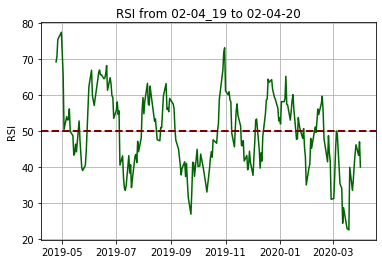

In [50]:
end_date=end.strftime("%d-%m-%y")
start_date=start.strftime("%d-%m_%y")

plt.title(f"RSI from {start_date} to {end_date}")
plt.ylabel("RSI")
plt.plot(TCS_oneYear['Date'], TCS_oneYear['RSI'], label='Close', color='Darkgreen')
plt.grid()
plt.axhline(50, color='Maroon', linewidth=2, linestyle='--' )

# Checking for mean stationary

In [74]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

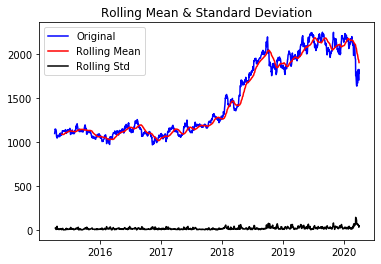

Results of Dickey-Fuller Test:
Test Statistic                   -0.886594
p-value                           0.792355
#Lags Used                       21.000000
Number of Observations Used    1208.000000
Critical Value (1%)              -3.435775
Critical Value (5%)              -2.863936
Critical Value (10%)             -2.568045
dtype: float64


In [78]:
test_stationarity(TCS['Adj Close'])

/Users/prasenjitnandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


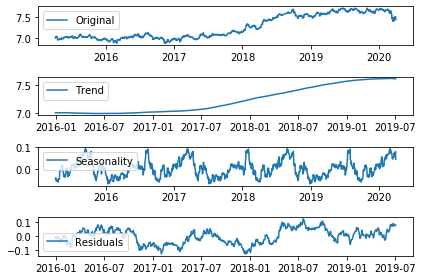

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_log = np.log(TCS['Adj Close'])

decomposition = seasonal_decompose(ts_log, freq = 365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

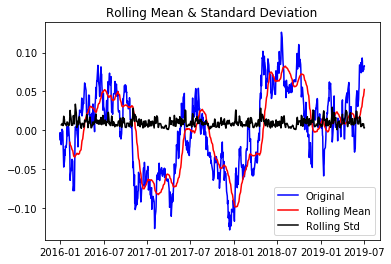

Results of Dickey-Fuller Test:
Test Statistic                  -3.077099
p-value                          0.028295
#Lags Used                       1.000000
Number of Observations Used    864.000000
Critical Value (1%)             -3.437941
Critical Value (5%)             -2.864891
Critical Value (10%)            -2.568554
dtype: float64


In [77]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

# Linear vs SVR regression

In [68]:
TCS2=TCS.copy()

In [69]:
TCS2['Julian'] =TCS2.index.to_julian_date()
TCS2 = sm.add_constant(TCS2) # Add a constant field for the linear regression
TCS2.tail()

,const,High,Low,Open,Close,Volume,Adj Close,Daily Return,Julian
Date,,,,,,,,,
2020-03-26,1.0,1832.050049,1722.550049,1831.599976,1790.949951,4556067.0,1790.949951,0.023225,2458934.5
2020-03-27,1.0,1850.000000,1750.400024,1820.000000,1824.500000,4331250.0,1824.500000,0.018733,2458935.5
2020-03-30,1.0,1905.000000,1763.550049,1766.000000,1778.500000,8513547.0,1778.500000,-0.025212,2458938.5
2020-03-31,1.0,1855.000000,1780.000000,1837.400024,1826.099976,3927593.0,1826.099976,0.026764,2458939.5
2020-04-01,1.0,1834.750000,1702.000000,1825.900024,1708.750000,4941878.0,1708.750000,-0.064263,2458940.5


In [70]:
TCS2.head()

,const,High,Low,Open,Close,Volume,Adj Close,Daily Return,Julian
Date,,,,,,,,,
2015-04-06,1.0,1281.449951,1250.050049,1279.000000,1273.650024,1568542.0,1097.812134,NaN,2457118.5
2015-04-07,1.0,1299.500000,1272.000000,1281.219971,1292.500000,1886922.0,1114.059692,0.014800,2457119.5
2015-04-08,1.0,1328.250000,1295.430054,1297.000000,1320.699951,1652134.0,1138.366455,0.021818,2457120.5
2015-04-09,1.0,1343.719971,1317.569946,1329.500000,1332.280029,2544450.0,1148.347778,0.008768,2457121.5
2015-04-10,1.0,1335.400024,1314.000000,1324.250000,1326.880005,1815544.0,1143.693359,-0.004053,2457122.5


/Users/prasenjitnandi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


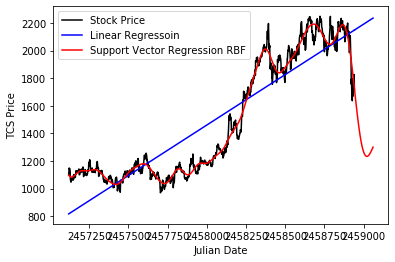

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

future_days = []
future_price = []


# Create model

days = TCS2["Julian"].to_frame()
price = TCS2["Adj Close"].to_frame()

linear = LinearRegression().fit(days, price)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.0001).fit(days, price)


# Extend a number of days for forecasting the future 
last_day = 2458940.5
for i in range(1, 120):
    future_days.append([last_day + i])
    future_price.append(np.nan)

    
# Convert back to float, so, divide every element by 100
linear_pred = list(map(lambda x: float(x), linear.predict(days)))
linear_pred_future = list(map(lambda x: float(x), linear.predict(future_days)))
svr_rbf_pred = list(map(lambda x: float(x), svr_rbf.predict(days)))
svr_rbf_pred_future = list(map(lambda x: float(x), svr_rbf.predict(future_days)))


# Plot data out

plt.plot(days, price, color='black', label='Stock Price')
plt.plot(days, linear_pred, color='blue', label='Linear Regressoin')
plt.plot(future_days, linear_pred_future, color='blue')
plt.plot(days, svr_rbf_pred, color='red', label='Support Vector Regression RBF')
plt.plot(future_days, svr_rbf_pred_future, color='red')
plt.xlabel('Julian Date')
plt.ylabel('TCS Price')
plt.legend(loc=2)
plt.show()

# Training LSTM

In [79]:
from __future__ import print_function
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [80]:
# parameters to be set ("optimum" hyperparameters obtained from grid search):
look_back = 7
epochs = 500
batch_size = 32

In [85]:
df=TCS.copy()

In [87]:
df.reset_index(inplace=True)

In [88]:
df.drop(["Date","High","Low","Open","Close","Volume","Daily Return"],axis=1,inplace=True)

In [89]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [90]:
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]

print('Split data into training set and test set... Number of training samples/ test samples:', len(train), len(test))

Split data into training set and test set... Number of training samples/ test samples: 824 406


In [91]:
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# convert Apple's stock price data into time series dataset
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [92]:
# reshape input of the LSTM to be format [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [93]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=epochs, batch_size=batch_size)

/Users/prasenjitnandi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/500
816/816 [==============================] - 1s 737us/step - loss: 0.0601
Epoch 2/500
816/816 [==============================] - 0s 101us/step - loss: 0.0291
Epoch 3/500
816/816 [==============================] - 0s 101us/step - loss: 0.0189
Epoch 4/500
816/816 [==============================] - 0s 90us/step - loss: 0.0154
Epoch 5/500
816/816 [==============================] - 0s 85us/step - loss: 0.0123
Epoch 6/500
816/816 [==============================] - 0s 82us/step - loss: 0.0095
Epoch 7/500
816/816 [==============================] - 0s 85us/step - loss: 0.0071
Epoch 8/500
816/816 [==============================] - 0s 86us/step - loss: 0.0050
Epoch 9/500
816/816 [==============================] - 0s 83us/step - loss: 0.0033
Epoch 10/500
816/816 [==============================] - 0s 80us/step - loss: 0.0020
Epoch 11/500
816/816 [==============================] - 0s 89us/step - loss: 0.0012
Epoch 12/500
816/816 [==============================] - 0s 90us/step - loss: 8.067

816/816 [==============================] - 0s 81us/step - loss: 3.5334e-04
Epoch 95/500
816/816 [==============================] - 0s 82us/step - loss: 3.4719e-04
Epoch 96/500
816/816 [==============================] - 0s 82us/step - loss: 3.4427e-04
Epoch 97/500
816/816 [==============================] - 0s 81us/step - loss: 3.4130e-04
Epoch 98/500
816/816 [==============================] - 0s 83us/step - loss: 3.4055e-04
Epoch 99/500
816/816 [==============================] - 0s 80us/step - loss: 3.4117e-04
Epoch 100/500
816/816 [==============================] - 0s 80us/step - loss: 3.4535e-04
Epoch 101/500
816/816 [==============================] - 0s 80us/step - loss: 3.5335e-04
Epoch 102/500
816/816 [==============================] - 0s 85us/step - loss: 3.4052e-04
Epoch 103/500
816/816 [==============================] - 0s 83us/step - loss: 3.3662e-04
Epoch 104/500
816/816 [==============================] - 0s 81us/step - loss: 3.3551e-04
Epoch 105/500
816/816 [=================

816/816 [==============================] - 0s 83us/step - loss: 2.4300e-04
Epoch 187/500
816/816 [==============================] - 0s 82us/step - loss: 2.4149e-04
Epoch 188/500
816/816 [==============================] - 0s 79us/step - loss: 2.4289e-04
Epoch 189/500
816/816 [==============================] - 0s 75us/step - loss: 2.5641e-04
Epoch 190/500
816/816 [==============================] - 0s 80us/step - loss: 2.4049e-04
Epoch 191/500
816/816 [==============================] - 0s 87us/step - loss: 2.4186e-04
Epoch 192/500
816/816 [==============================] - 0s 84us/step - loss: 2.3754e-04
Epoch 193/500
816/816 [==============================] - 0s 82us/step - loss: 2.3714e-04
Epoch 194/500
816/816 [==============================] - 0s 83us/step - loss: 2.3659e-04
Epoch 195/500
816/816 [==============================] - 0s 81us/step - loss: 2.3943e-04
Epoch 196/500
816/816 [==============================] - 0s 80us/step - loss: 2.3445e-04
Epoch 197/500
816/816 [============

816/816 [==============================] - 0s 85us/step - loss: 2.2425e-04
Epoch 279/500
816/816 [==============================] - 0s 86us/step - loss: 2.0995e-04
Epoch 280/500
816/816 [==============================] - 0s 83us/step - loss: 2.0725e-04
Epoch 281/500
816/816 [==============================] - 0s 84us/step - loss: 2.0907e-04
Epoch 282/500
816/816 [==============================] - 0s 81us/step - loss: 2.1128e-04
Epoch 283/500
816/816 [==============================] - 0s 86us/step - loss: 2.0769e-04
Epoch 284/500
816/816 [==============================] - 0s 85us/step - loss: 2.1200e-04
Epoch 285/500
816/816 [==============================] - 0s 89us/step - loss: 2.1706e-04
Epoch 286/500
816/816 [==============================] - 0s 85us/step - loss: 2.1397e-04
Epoch 287/500
816/816 [==============================] - 0s 84us/step - loss: 2.0645e-04
Epoch 288/500
816/816 [==============================] - 0s 89us/step - loss: 2.0994e-04
Epoch 289/500
816/816 [============

816/816 [==============================] - 0s 87us/step - loss: 1.9452e-04
Epoch 371/500
816/816 [==============================] - 0s 79us/step - loss: 2.0134e-04
Epoch 372/500
816/816 [==============================] - 0s 75us/step - loss: 1.9670e-04
Epoch 373/500
816/816 [==============================] - 0s 83us/step - loss: 2.0016e-04
Epoch 374/500
816/816 [==============================] - 0s 86us/step - loss: 1.9386e-04
Epoch 375/500
816/816 [==============================] - 0s 92us/step - loss: 2.0051e-04
Epoch 376/500
816/816 [==============================] - 0s 84us/step - loss: 1.9269e-04
Epoch 377/500
816/816 [==============================] - 0s 86us/step - loss: 1.9519e-04
Epoch 378/500
816/816 [==============================] - 0s 85us/step - loss: 2.0043e-04
Epoch 379/500
816/816 [==============================] - 0s 92us/step - loss: 1.9876e-04
Epoch 380/500
816/816 [==============================] - 0s 86us/step - loss: 1.9626e-04
Epoch 381/500
816/816 [============

816/816 [==============================] - 0s 86us/step - loss: 1.9018e-04
Epoch 463/500
816/816 [==============================] - 0s 80us/step - loss: 1.9467e-04
Epoch 464/500
816/816 [==============================] - 0s 76us/step - loss: 1.9758e-04
Epoch 465/500
816/816 [==============================] - 0s 74us/step - loss: 1.9056e-04
Epoch 466/500
816/816 [==============================] - 0s 75us/step - loss: 1.9036e-04
Epoch 467/500
816/816 [==============================] - 0s 73us/step - loss: 1.9660e-04
Epoch 468/500
816/816 [==============================] - 0s 80us/step - loss: 1.9014e-04
Epoch 469/500
816/816 [==============================] - 0s 82us/step - loss: 1.9154e-04
Epoch 470/500
816/816 [==============================] - 0s 87us/step - loss: 1.8689e-04
Epoch 471/500
816/816 [==============================] - 0s 86us/step - loss: 1.8764e-04
Epoch 472/500
816/816 [==============================] - 0s 90us/step - loss: 1.8682e-04
Epoch 473/500
816/816 [============

In [94]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [95]:
# invert predictions and targets to unscaled
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [96]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 17.34 RMSE
Test Score: 35.23 RMSE


In [97]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift predictions of test data for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict

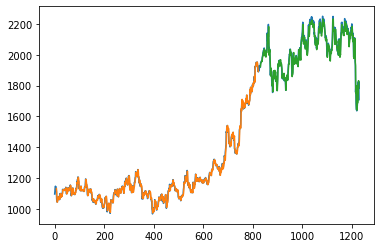

In [98]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)